## Multi Layer Perceptron
---------

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
# Helper function to plot a decision boundary.
def plot_decision_boundary(pred_func, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y.reshape((4, )), cmap=plt.cm.Spectral)

In [3]:
class DNN(object):
    def __init__(self, layer_dims, learning_rate=0.01):
        """
        argument:
        layer_dims: a list containing the number of neurons in the respective layers of the network
        learning_rate: a hyperparam used in gradient descent
        """
        self.num_layers = len(layer_dims)
        self.layer_dims = layer_dims
        self.weights = [np.random.randn(x, y)
                       for x, y in zip(layer_dims[:-1], layer_dims[1:])]

        self.biases = [np.random.rand(1, y)
                      for y in layer_dims[1:]]
    
            
        self.learning_rate = 0.01
  
    def _sigmoid(self, z):
        """a sigmoid activation function
        """
        return 1.0/(1.0+np.exp(-z))

    def _sigmoid_prime(self, z):
        """the derivative of a sigmoid activation function
        """
        return self._sigmoid(z) * (1 - self._sigmoid(z))
  
    def feedforward(self, x):
        """performing the feedforward pass
        """
        zs = []
        activations = [x]
        a = x
        
        for w, b in zip(self.weights, self.biases):
            z = np.dot(a, w) + b
            zs.append(z)
            a = self._sigmoid(z)
            activations.append(a)

        self.zs = zs
        self.activations = activations
        return self.activations[-1]
  
    def compute_cost(self, y_hat, y):
        """
        Computes the cross-entropy cost
        parameters
        ----------
        y_hat: np.ndarray
            the output generated by the output layer
        y: np.ndarray
            the true labels
            
        return
        ----------
        cost: np.float64
            the cost per feedforward pass 
        """
        m = y.shape[0] # number of example
        logprobs = np.multiply(np.log(y_hat), y) + np.multiply((1 - y), np.log(1 - y_hat))
        cost = - np.sum(logprobs) / m
        cost = np.squeeze(cost)     # makes sure cost is the dimension we expect.
        return cost
    
        
    def backprop(self, y):
        """
        performs the backpropagation algorithm
        
        parameters
        ------------
        y: np.ndarray
            the true label
            
        returns
        ------------
        dW: list
            contains all the partial derivative of W
        db: list
            contains all the partial derivative of b
        """
        dW = [np.zeros(w.shape) for w in self.weights]
        db = [np.zeros(b.shape) for b in self.biases]

        delta = (self.activations[-1] - y) * self._sigmoid_prime(self.zs[-1])
        db[-1] = np.squeeze(np.sum(delta, axis=0, keepdims=True))
        dW[-1] = np.dot(self.activations[-2].T, delta)

        for l in xrange(2, self.num_layers):
            z = self.zs[-l]
            delta = np.dot(delta, self.weights[-l+1].T) * self._sigmoid_prime(z)
            db[-l] = np.squeeze(np.sum(delta, axis=0, keepdims=True))
            dW[-l] = np.dot(self.activations[-l-1].T, delta)

        return dW, db
  
    def update_parameters(self, dW, db):
        """performs an update parameters for gradient descent
        
        parameter
        ----------
        dW: list
            contains all the partial derivative of W
        db: list
            contains all the partial derivative of b 
        """
        weights = []
        biases = []
        for w, b, dw, _db in zip(self.weights, self.biases, dW, db):
        
            w = w - self.learning_rate * dw
            b = b - self.learning_rate * _db
            weights.append(w)
            biases.append(b)

        self.weights = weights
        self.biases = biases
    
    def predict(self, data):
        """
        an interface to generate prediction
        parameters
        ------------
        data: np.ndarray
           input features to our model
        
        return
        ------------
            np.ndarray - the predicted labels
        """
        a = self.feedforward(data)
        predictions = np.round(a)

        return predictions

In [4]:
def build_model(X, y, layer_dims, learning_rate=0.01, num_iterations=50000, verbose=True):
    """
    an intermediate method to train our model
    parameters
    -------------------
    X: numpy.ndarray
        input data
    y: numpy.ndarray
        the real label
    layer_dims: list
        a list of integer representing the number of neurons in each layer, 
        where len(layer_dims) equals to the number of layers in our neural net architecture
        for instance, layer_dims = [2, 3, 3, 1] would mean a neural net with
            : 2 neurons in the input layer, 3 neurons in the first hidden layer
              3 neurons in the second hidden layer, 1 neuron in the output layer
    learning_rate: float
        hyperparam for gradient descent algorithm
    num_iterations: int
        number of passes, each pass using number of examples. 
    verbose: boolean
        optional. if True, it will print the cost per 1000 iteration
        
    return
    ---------------------
    model: an instance of NN object that represent the trained neural net model
    cost_history: a list containing the cost during training
    """
    model = DNN(layer_dims=layer_dims, learning_rate=learning_rate)
    cost_history = []
    for i in range(0, num_iterations):
        A2 = model.feedforward(X)
        cost = model.compute_cost(A2, y)
        dW, db = model.backprop(y)
        model.update_parameters(dW, db)
        if i % 1000 == 0 and verbose:
            print ("Iteration %i Cost: %f" % (i, cost))
            
        cost_history.append(cost)
    return model, cost_history

In [5]:
X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
y = np.array([[0,1,1,0]]).T

Iteration 0 Cost: 0.706503
Iteration 1000 Cost: 0.692592
Iteration 2000 Cost: 0.691584
Iteration 3000 Cost: 0.690747
Iteration 4000 Cost: 0.690013
Iteration 5000 Cost: 0.689333
Iteration 6000 Cost: 0.688674
Iteration 7000 Cost: 0.688008
Iteration 8000 Cost: 0.687311
Iteration 9000 Cost: 0.686562
Iteration 10000 Cost: 0.685739
Iteration 11000 Cost: 0.684820
Iteration 12000 Cost: 0.683779
Iteration 13000 Cost: 0.682590
Iteration 14000 Cost: 0.681218
Iteration 15000 Cost: 0.679624
Iteration 16000 Cost: 0.677761
Iteration 17000 Cost: 0.675571
Iteration 18000 Cost: 0.672983
Iteration 19000 Cost: 0.669913
Iteration 20000 Cost: 0.666257
Iteration 21000 Cost: 0.661895
Iteration 22000 Cost: 0.656693
Iteration 23000 Cost: 0.650508
Iteration 24000 Cost: 0.643206
Iteration 25000 Cost: 0.634676
Iteration 26000 Cost: 0.624853
Iteration 27000 Cost: 0.613730
Iteration 28000 Cost: 0.601343
Iteration 29000 Cost: 0.587715
Iteration 30000 Cost: 0.572751
Iteration 31000 Cost: 0.556070
Iteration 32000 Cost:

Text(0.5,1,u'Neural Networks with 2 hidden layers neurons')

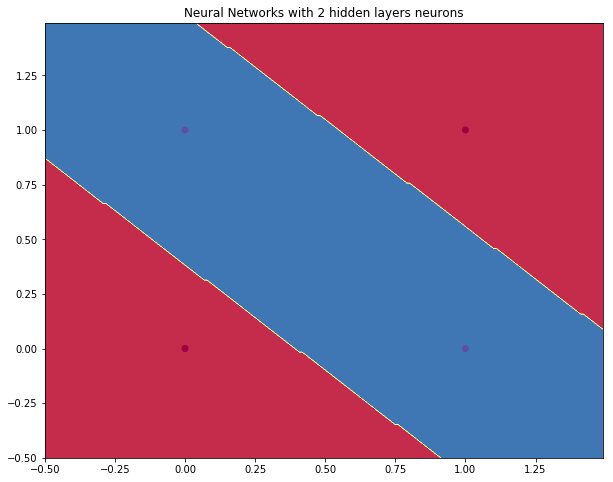

In [6]:
model, cost_history = build_model(X, y, [2, 3, 3, 1])
# Plot the decision boundary
plot_decision_boundary(lambda x: model.predict(x), X, y)
plt.title("Neural Networks with 2 hidden layers neurons")

Iteration 0 Cost: 0.705990
Iteration 1000 Cost: 0.693708
Iteration 2000 Cost: 0.693672
Iteration 3000 Cost: 0.693636
Iteration 4000 Cost: 0.693601
Iteration 5000 Cost: 0.693567
Iteration 6000 Cost: 0.693534
Iteration 7000 Cost: 0.693501
Iteration 8000 Cost: 0.693468
Iteration 9000 Cost: 0.693435
Iteration 10000 Cost: 0.693403
Iteration 11000 Cost: 0.693371
Iteration 12000 Cost: 0.693339
Iteration 13000 Cost: 0.693307
Iteration 14000 Cost: 0.693274
Iteration 15000 Cost: 0.693242
Iteration 16000 Cost: 0.693209
Iteration 17000 Cost: 0.693176
Iteration 18000 Cost: 0.693142
Iteration 19000 Cost: 0.693107
Iteration 20000 Cost: 0.693072
Iteration 21000 Cost: 0.693036
Iteration 22000 Cost: 0.692999
Iteration 23000 Cost: 0.692960
Iteration 24000 Cost: 0.692921
Iteration 25000 Cost: 0.692880
Iteration 26000 Cost: 0.692837
Iteration 27000 Cost: 0.692793
Iteration 28000 Cost: 0.692746
Iteration 29000 Cost: 0.692698
Iteration 30000 Cost: 0.692647
Iteration 31000 Cost: 0.692593
Iteration 32000 Cost:

Text(0.5,1,u'Neural Networks with 3 hidden layers neurons')

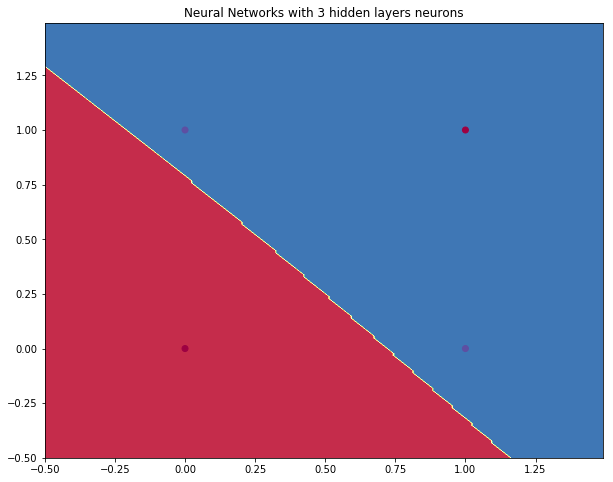

In [7]:
model, cost_history = build_model(X, y, [2, 3, 3, 3, 1])
# Plot the decision boundary
plot_decision_boundary(lambda x: model.predict(x), X, y)
plt.title("Neural Networks with 3 hidden layers neurons")

Iteration 0 Cost: 2.088434
Iteration 1000 Cost: 0.845383
Iteration 2000 Cost: 0.690060
Iteration 3000 Cost: 0.688821
Iteration 4000 Cost: 0.687444
Iteration 5000 Cost: 0.685846
Iteration 6000 Cost: 0.683933
Iteration 7000 Cost: 0.681598
Iteration 8000 Cost: 0.678705
Iteration 9000 Cost: 0.675089
Iteration 10000 Cost: 0.670533
Iteration 11000 Cost: 0.664760
Iteration 12000 Cost: 0.657421
Iteration 13000 Cost: 0.648082
Iteration 14000 Cost: 0.636226
Iteration 15000 Cost: 0.621235
Iteration 16000 Cost: 0.602330
Iteration 17000 Cost: 0.578428
Iteration 18000 Cost: 0.547960
Iteration 19000 Cost: 0.508920
Iteration 20000 Cost: 0.459776
Iteration 21000 Cost: 0.401578
Iteration 22000 Cost: 0.339773
Iteration 23000 Cost: 0.282279
Iteration 24000 Cost: 0.234507
Iteration 25000 Cost: 0.197371
Iteration 26000 Cost: 0.169177
Iteration 27000 Cost: 0.147711
Iteration 28000 Cost: 0.131118
Iteration 29000 Cost: 0.118039
Iteration 30000 Cost: 0.107527
Iteration 31000 Cost: 0.098920
Iteration 32000 Cost:

Text(0.5,1,u'Neural Networks with 2 hidden layers neurons and 5 neurons each')

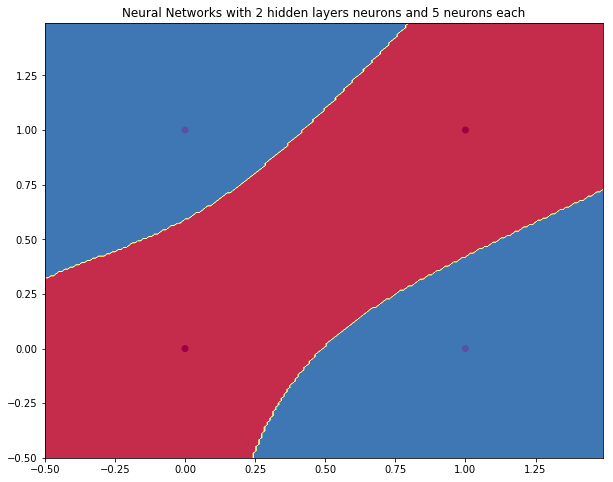

In [8]:
model, cost_history = build_model(X, y, [2, 5, 5, 1])
# Plot the decision boundary
plot_decision_boundary(lambda x: model.predict(x), X, y)
plt.title("Neural Networks with 2 hidden layers neurons and 5 neurons each")

Iteration 0 Cost: 1.028033
Iteration 1000 Cost: 0.687700
Iteration 2000 Cost: 0.682116
Iteration 3000 Cost: 0.674516
Iteration 4000 Cost: 0.664335
Iteration 5000 Cost: 0.651776
Iteration 6000 Cost: 0.637367
Iteration 7000 Cost: 0.621206
Iteration 8000 Cost: 0.602969
Iteration 9000 Cost: 0.582257
Iteration 10000 Cost: 0.558790
Iteration 11000 Cost: 0.532433
Iteration 12000 Cost: 0.503194
Iteration 13000 Cost: 0.471317
Iteration 14000 Cost: 0.437485
Iteration 15000 Cost: 0.402928
Iteration 16000 Cost: 0.369119
Iteration 17000 Cost: 0.337273
Iteration 18000 Cost: 0.308112
Iteration 19000 Cost: 0.281918
Iteration 20000 Cost: 0.258680
Iteration 21000 Cost: 0.238216
Iteration 22000 Cost: 0.220262
Iteration 23000 Cost: 0.204522
Iteration 24000 Cost: 0.190710
Iteration 25000 Cost: 0.178558
Iteration 26000 Cost: 0.167832
Iteration 27000 Cost: 0.158326
Iteration 28000 Cost: 0.149866
Iteration 29000 Cost: 0.142304
Iteration 30000 Cost: 0.135515
Iteration 31000 Cost: 0.129394
Iteration 32000 Cost:

Text(0.5,1,u'Neural Networks with 2 hidden layers neurons')

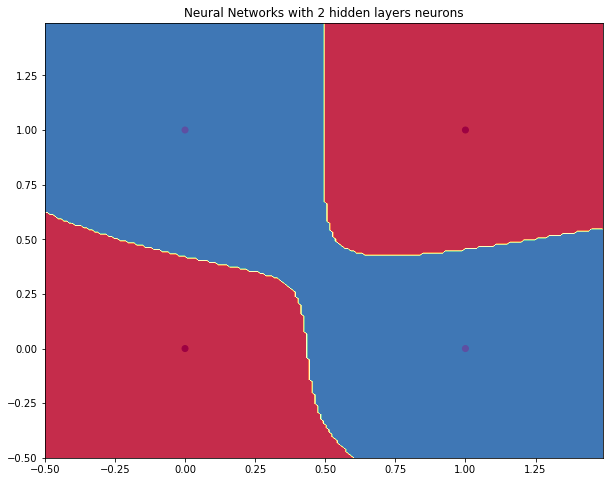

In [220]:
model, cost_history = build_model(X, y, [2, 5, 1])
# Plot the decision boundary
plot_decision_boundary(lambda x: model.predict(x), X, y)
plt.title("Neural Networks with 2 hidden layers neurons")

Iteration 0 Cost: 0.779131
Iteration 1000 Cost: 0.693641
Iteration 2000 Cost: 0.693142
Iteration 3000 Cost: 0.692652
Iteration 4000 Cost: 0.692153
Iteration 5000 Cost: 0.691628
Iteration 6000 Cost: 0.691059
Iteration 7000 Cost: 0.690425
Iteration 8000 Cost: 0.689704
Iteration 9000 Cost: 0.688864
Iteration 10000 Cost: 0.687868
Iteration 11000 Cost: 0.686665
Iteration 12000 Cost: 0.685186
Iteration 13000 Cost: 0.683333
Iteration 14000 Cost: 0.680963
Iteration 15000 Cost: 0.677865
Iteration 16000 Cost: 0.673721
Iteration 17000 Cost: 0.668044
Iteration 18000 Cost: 0.660081
Iteration 19000 Cost: 0.648655
Iteration 20000 Cost: 0.631848
Iteration 21000 Cost: 0.606438
Iteration 22000 Cost: 0.567125
Iteration 23000 Cost: 0.506904
Iteration 24000 Cost: 0.423201
Iteration 25000 Cost: 0.329816
Iteration 26000 Cost: 0.250237
Iteration 27000 Cost: 0.193800
Iteration 28000 Cost: 0.156034
Iteration 29000 Cost: 0.130379
Iteration 30000 Cost: 0.112260
Iteration 31000 Cost: 0.098928
Iteration 32000 Cost:

Text(0.5,1,u'Neural Networks with 3 hidden layers neurons')

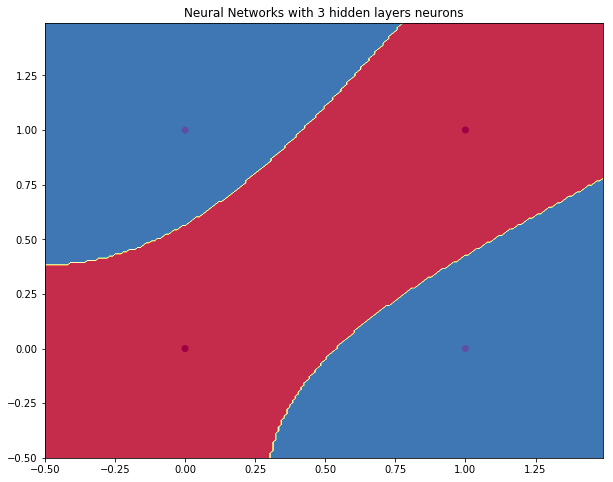

In [222]:
model, cost_history = build_model(X, y, [2, 5, 5, 5, 1])
# Plot the decision boundary
plot_decision_boundary(lambda x: model.predict(x), X, y)
plt.title("Neural Networks with 3 hidden layers neurons")

Iteration 0 Cost: 0.929881
Iteration 1000 Cost: 0.696725
Iteration 2000 Cost: 0.696257
Iteration 3000 Cost: 0.695858
Iteration 4000 Cost: 0.695513
Iteration 5000 Cost: 0.695212
Iteration 6000 Cost: 0.694945
Iteration 7000 Cost: 0.694707
Iteration 8000 Cost: 0.694491
Iteration 9000 Cost: 0.694294
Iteration 10000 Cost: 0.694112
Iteration 11000 Cost: 0.693942
Iteration 12000 Cost: 0.693782
Iteration 13000 Cost: 0.693630
Iteration 14000 Cost: 0.693484
Iteration 15000 Cost: 0.693341
Iteration 16000 Cost: 0.693202
Iteration 17000 Cost: 0.693064
Iteration 18000 Cost: 0.692926
Iteration 19000 Cost: 0.692787
Iteration 20000 Cost: 0.692645
Iteration 21000 Cost: 0.692500
Iteration 22000 Cost: 0.692349
Iteration 23000 Cost: 0.692192
Iteration 24000 Cost: 0.692026
Iteration 25000 Cost: 0.691851
Iteration 26000 Cost: 0.691663
Iteration 27000 Cost: 0.691462
Iteration 28000 Cost: 0.691244
Iteration 29000 Cost: 0.691007
Iteration 30000 Cost: 0.690748
Iteration 31000 Cost: 0.690463
Iteration 32000 Cost:

Text(0.5,1,u'Neural Networks with 2 hidden layers neurons')

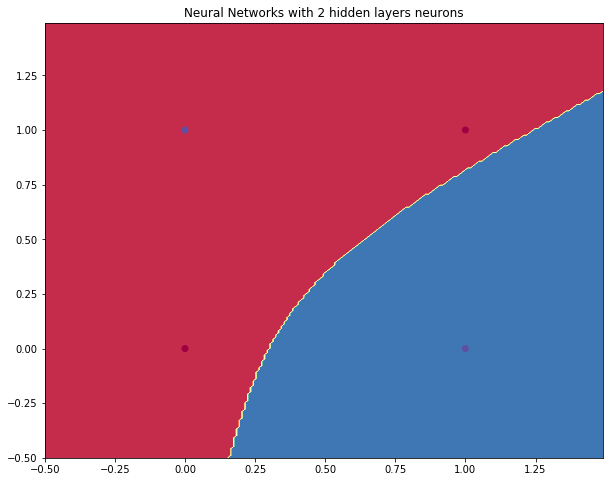

In [223]:
model, cost_history = build_model(X, y, [2, 5, 5, 5, 1])
# Plot the decision boundary
plot_decision_boundary(lambda x: model.predict(x), X, y)
plt.title("Neural Networks with 2 hidden layers neurons")